<div class="">
<center><br><font size="12"><font face="calibri"><strong>Tugas UAS 
    <br>
<br><strong>Mata Kuliah Kecerdasan Buatan

# Breast Cancer

Kanker payudara adalah kondisi ketika sel kanker terbentuk di jaringan payudara. Kanker bisa terbentuk di kelenjar yang menghasilkan susu (lobulus), atau di saluran (duktus) yang membawa air susu dari kelenjar ke puting payudara. Kanker juga bisa terbentuk di jaringan lemak atau jaringan ikat di dalam payudara.Di seluruh dunia, kanker payudara adalah jenis kanker yang paling umum pada wanita dan tertinggi kedua dalam hal tingkat kematian. Diagnosis kanker payudara dilakukan ketika benjolan abnormal ditemukan (dari pemeriksaan sendiri atau x-ray) atau setitik kecil dari kalsium terlihat (pada x-ray). Setelah benjolan yang mencurigakan ditemukan, dokter akan melakukan diagnosis untuk menentukan apakah itu adalah kanker dan, jika demikian, apakah telah menyebar ke bagian lain dari tubuh.

# Dataset

Disini Saya menggunakan DataSet Breast Cancer Winconsin(Prognostic) Yang saya dapat dari website database yang bernama KAGGLE
Adapun Linknya : https://www.kaggle.com/sarahvch/breast-cancer-wisconsin-prognostic-data-set

Pada Dataset ini terdapat 569 data dan 31 Variabel Yang Terdiri dari :
1. radius_mean                    
2. texture_mean
3. perimeter_mean
4. area_mean
5. smoothness_mean
6. compactness_mean
7. concavity_mean
8. concave points_mean
9. symmetry_mean
10. fractal_dimension_mean
11. radius_se
12. texture_se
13. perimeter_se
14. area_se
15. smoothness_se
16. compactness_se
17. concavity_se
18. concave points_se
19. symmetry_se
20. fractal_dimension_se
21. radius_worst
22. texture_worst
23. perimeter_worst
24. area_worst
25. smoothness_worst
26. compactness_worst
27. concavity_worst
28. concave points_worst
29. symmetry_worst
30. fractal_dimension_worst
31. Diagnosis
    - 0 = B Atau Tidak terdiagnosis Kanker payudara
    - 1 = M Terdeteksi Kanker payudara


# Artificial Neural Network (ANN)

- ANN adalah salah satu main tools yang digunakan dalam Machine Learning
- Seperti yang ditunjukkan oleh bagian "Neural" dari namanya, mereka adalah sistem "Brain-Inspired" yang dimaksudkan untuk mereplikasi cara  manusia belajar.
- Neural Network terdiri dari input dan output layer, serta (dalam kebanyakan kasus) hidden layer yang terdiri dari unit-unit yang mengubah input menjadi sesuatu yang dapat digunakan oleh output layer.
- ANN adalah tools yang sangat baik untuk menemukan pola yang terlalu rumit atau banyak bagi seorang programmer untuk mengekstraksi dan mengajarkan mesin untuk mengenali sesuatu.
- Neural Network juga disebut "perceptrons".
- Neural Network telah menjadi bagian utama dari kecerdasan buatan dalam beberapa dekade terakhir. Ini disebabkan oleh kedatangan teknik yang disebut "backpropagation," yang memungkinkan network untuk menyesuaikan hidden layer neuron mereka dalam situasi di mana hasilnya tidak sesuai dengan apa yang diharapkan creator.

# Import Library

In [1]:
#Memanggil Library yang diperlukan ,
from sklearn.preprocessing import MinMaxScaler #
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.activations import relu
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
import pandas as pd
import sklearn
import keras
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix

Using TensorFlow backend.


# Import Dataset

In [2]:
data = pd.read_csv('C:/Users/RAFI/Downloads/Prof/dataset/data 2.csv')

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
data = data.drop(columns=['Unnamed: 32','id'])

In [5]:
data.shape

(569, 31)

Pada Bagian ini,saya mengubah isi diagnosis yang sebelumnya adalah M dan B dengan mengubahnya menjadi 1 dan 0,karna dalam pemosresan bahasa python,bahasa ini tidak dapat memporses kalimat dan hanya bisa memproses numerical,dalam pengubahan ini saya menggunakan proses Label Encoder

In [6]:
enc = LabelEncoder()
dataset = data.apply(enc.fit_transform)
dataset.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,370,1,455,452,444,531,521,526,416,...,425,41,497,516,358,516,520,483,485,506
1,1,426,186,486,513,120,215,321,396,219,...,419,199,465,511,158,210,278,401,222,375
2,1,406,324,478,487,403,459,478,516,348,...,399,261,455,491,287,464,438,468,445,361
3,1,98,297,164,95,471,533,507,493,426,...,215,298,281,194,408,524,511,479,499,533
4,1,418,60,493,506,332,414,480,492,216,...,381,28,453,470,239,245,415,363,81,216


Bisa kita lihat setelah di ubah,pada isi Label Diagnosis sudah berubah Menjadi 1 dan 0

# Pre Processing

Preprocessing data adalah tahap penting dalam pembelajaran mesin, karena data masukan yang baik dan tepat (harusnya) akan membuat estimator mampu menghasilkan keluaran yang baik pula.

Pada Bagian ini,kita melakukan proses membagi data menjadi 2 kategori,yang pertama adalah X yang berisi Fitur dan Y yang berupa Label,disini label nya adalah "Diagnosis"


In [7]:
x = dataset.iloc[:,1:33].values

In [8]:
y = dataset.iloc[:,0]

In [9]:
y.shape

(569,)

In [10]:
y.unique()

array([1, 0], dtype=int64)

# Membagi Data train dan test

Model Machine Learning,biasanya membutuhkan Data Train Dan data Test,hal yang harus di perhatikan adalah,sebaiknya proposi data Train harus lebih banyak dari data test,seperti dalam hal ini saya membagi data Train sebanyak 80% dan data Test Sebanyak 20%

In [11]:
# split data train test.
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

# Fitur Normalisasi

Normalisasi adalah konsep penting lainnya yang diperlukan untuk mengubah semua fitur ke skala yang sama. Hal ini memungkinkan konvergensi yang lebih cepat pada pembelajaran, dan pengaruh yang lebih seragam untuk semua bobot. Dalam hal ini digunakan MinMaxScaler yang mengubah fitur dengan penskalaan setiap fitur ke rentang yang diberikan (menjadi antara 0 dan 1).

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train

array([[0.55604396, 0.94142259, 0.60652591, ..., 0.51836735, 0.09292929,
        0.60412758],
       [0.17362637, 0.29079498, 0.15547025, ..., 0.08571429, 0.17171717,
        0.24015009],
       [0.86813187, 0.78242678, 0.89635317, ..., 0.76122449, 0.74747475,
        0.75797373],
       ...,
       [0.35164835, 0.03974895, 0.35508637, ..., 0.03673469, 0.10909091,
        0.2195122 ],
       [0.33626374, 0.02719665, 0.35892514, ..., 0.53061224, 0.70505051,
        0.36210131],
       [0.79120879, 0.87029289, 0.83685221, ..., 0.76734694, 0.05858586,
        0.77110694]])

In [13]:
x_test

array([[ 0.54285714,  0.06694561,  0.5950096 , ...,  0.50204082,
         0.05858586,  0.28517824],
       [ 0.64395604,  0.51464435,  0.69097889, ...,  0.67959184,
         0.59393939,  0.62476548],
       [ 0.07032967,  0.41841004,  0.05758157, ...,  0.03061224,
         0.66262626,  0.4727955 ],
       ...,
       [ 0.74945055,  0.69037657,  0.80038388, ...,  0.89387755,
         0.89494949,  0.79737336],
       [ 0.64835165,  0.89748954,  0.66410749, ...,  0.04693878,
        -0.0040404 , -0.00187617],
       [ 0.76483516,  0.5125523 ,  0.81957774, ...,  0.97346939,
         0.7030303 ,  0.72232645]])

# Model Sequential

Model Sekuensial adalah tumpukan lapisan linear. Dalam menentukan bentuk masukan, model perlu tahu bentuk masukan apa yang diharapkan. Lapisan pertama dalam model Sequential (dan hanya yang pertama, karena lapisan berikutnya dapat melakukan inferensi bentuk otomatis) perlu menerima informasi tentang bentuk inputnya. Kemudian untuk menambahkan lapisan cukup dengan menambahkan perintah add.

In [14]:
model = Sequential()
model.add(Dense(units =200 ,input_dim = 30,activation="relu"))
model.add(Dense(units =150 ,activation="relu"))
model.add(Dense(units =1 ,activation="sigmoid"))

Di mode sequential ini,Saya menggunakan 3 layer yang terdiri dari :
1. Input Layer dan Hidden Layer 1
2. Hidden Layer 2
3. Output Layer

Terdapat Input_dim,input Dim adalah Banyak nya Fitur Yang Kita gunakan,disini saya menggunakan 30 fitur

#### Activation Function

**Activation** function befungsi untuk menentukan apakah neuron tersebut harus “aktif” atau tidak berdasarkan dari weighted sum dari input. Secara umum terdapat 2 jenis activation function, Linear dan Non-Linear Activation function.
disini saya menggunakan Activation Function ReLu Untuk Input

**Relu** melakukan “treshold” dari 0 hingga infinity. ReLU juga dapat menutupi kelemahan yang dimiliki oleh Sigmoid. Karna ReLU pada intinya hanya membuat pembatas pada bilangan nol, artinya apabila x ≤ 0 maka x = 0 dan apabila x > 0 maka x = x Ada beberapa pro dan kontra ketika kita menggunakan ReLU:

Kelebihan :

   - ReLU sangat mempercepat proses konvergensi yang dilakukan dengan stochastic gradient descent jika dibandingkan dengan sigmoid / tanh.
    Jika kita bandingan dengan sigmoid/tanh yang memiliki operasi-operasi yang “expensive” (exponentials, etc.), ReLU bisa kita implementasikan hanya dengan membuat pembatas(threshold) pada bilangan nol.

Kekurangan :

   - Sayangnya, unit ReLU bisa menjadi rapuh pada saat proses training dan bisa membuat unit tersebut “mati”. Sebagai contohnya, kita mungkin bisa menemukan bahwa 40% dari network kita “mati” (neuron yang tidak akan pernah aktif selama proses training) apabila learning rate yang kita inisialisasi terlalu tinggi. Namun apabila kita menginisialisasi learning rate kita secara tepat maka hal seperti ini jarang menjadi masalah.
   
**Untuk Output saya menggunakan Activation Sigmoid**

**Sigmoid** function mempunyai rentang antara 0 hingga 1 sedangkan rentang dari Tanh adalah -1 hingga 1.
Sigmoid memiliki bentuk formula sebagai berikut :
\begin{split}S(x) = \frac{1} { 1+e-x }\end{split}
Sigmoid akan menerima angka tunggal dan mengubah nilai x menjadi sebuah nilai yang memiliki range mulai dari 0 sampai 1. Belakangan ini Sigmoid tidak disukai dan jarang digunakan, sigmoid memiliki kekurangan berupa:
- Sigmoid mematikan gradient, property yang paling tidak diinginkan dari Sigmoid adalah ketika activation dari neuron mengeluarkan nilai yang berada pada ekor 0 atau 1, dimana gradient di wilayah ini hampir nol. Karena itu, jika gradient memiliki nilai yang sangat kecil, Sigmoid akan “mematikan” gradient dan kita sangat tidak menginginkan hal ini terjadi saat melakukan backpropagation.
- Output dari Sigmoid tidak zero-centered. Hal ini berimplikasi pada kedinamisan saat melakukan gradient descent, karna apabila data yang datang ke neuron selalu positif maka gradient pada weights selama backpropagation akan menjadi semua positif atau semua negatif. Hal seperti ini dapat mengganggu proses training, tetapi hal ini tidak separah seperti hal yang ada pada point pertama(mematikan gradient).



In [15]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(lr=0.00001),loss="binary_crossentropy",metrics=["accuracy"])

Disini Saya menggunakan Optimizer Adam dengan learning rate 0.00001

## dibawah ini adalah pengertian dari Optimizer dan Adam

Adapun Pengertian Optimizer adalah 
- digunakan untuk memperbarui bobot dan bias yaitu parameter internal model untuk mengurangi kesalahan.
  Teknik yang paling penting dan dasar bagaimana kita melatih dan mengoptimalkan model kita adalah menggunakan   Gradient Descent.digunakan untuk memperbarui bobot dan bias yaitu parameter internal model untuk mengurangi kesalahan.
  Teknik yang paling penting dan dasar bagaimana kita melatih dan mengoptimalkan model kita adalah menggunakan Gradient Descent.
  

**Adam** merupakan cara lain untuk menggunakan gradien masa sebelumnya untuk menghitung gradien saat ini. Adam juga memanfaatkan konsep momentum dengan menambahkan pecahan dari gradien sebelumnya ke yang sekarang. Pengoptimal ini telah menjadi sangat luas, dan secara praktis diterima untuk digunakan dalam test neural network.

Disini saya juga menggunakan loss **Binary_crossentropy**,saya menggunakan loss tersebut karna,pada label yang akan kita cari isi nya berupa bilangan biner atau 0 dan 1

In [16]:
hasil_train = model.fit(x_train,y_train, validation_data=(x_test,y_test),batch_size=25,epochs=100)

Train on 455 samples, validate on 114 samples
Epoch 1/100
455/455 [==============================] - 1s 2ms/step - loss: 0.7076 - accuracy: 0.5714 - val_loss: 0.7112 - val_accuracy: 0.5263
Epoch 2/100
455/455 [==============================] - 0s 127us/step - loss: 0.7037 - accuracy: 0.5714 - val_loss: 0.7066 - val_accuracy: 0.5263
Epoch 3/100
455/455 [==============================] - 0s 141us/step - loss: 0.7000 - accuracy: 0.5824 - val_loss: 0.7024 - val_accuracy: 0.5175
Epoch 4/100
455/455 [==============================] - 0s 140us/step - loss: 0.6962 - accuracy: 0.5780 - val_loss: 0.6982 - val_accuracy: 0.5351
Epoch 5/100
455/455 [==============================] - 0s 123us/step - loss: 0.6926 - accuracy: 0.5670 - val_loss: 0.6937 - val_accuracy: 0.5351
Epoch 6/100
455/455 [==============================] - 0s 128us/step - loss: 0.6889 - accuracy: 0.5890 - val_loss: 0.6898 - val_accuracy: 0.5351
Epoch 7/100
455/455 [==============================] - 0s 134us/step - loss: 0.6855 - 

Pada saat Mau men Train data,saya menggunakan yang namanya **batch_size** dan **Epoch**
### Batch Size
Batch Size adalah jumlah sampel data yang disebarkan ke Neural Network. Contoh: jika kita mempunyai 100 dataset dan batch size kita adalah 5 maka algoritma ini akan menggunakan 5 sempel data pertama dari 100 data yang kita miliki (ke1, ke2, ke3, ke4, dan ke5) lalu disebarkankan atau ditraining oleh Neural Network sampai selesai kemudian mengambil kembali 5 sampel data kedua dari 100 data (ke6, ke7, ke8, ke9, dan ke10), dan begitu seterusnya sampai 5 sampel data ke 20 (100⁄5=20).

### Epoch
Epoch adalah proses pengulangan yang terjadi pada saat kita melakukan training data,banyak nya epoch adalah banyaknya pengulangan yang akan kita lakukan,seperti disini saya memakai 100 epoch berarti saya mengulang proses itu sebanyak 100 kali

  


## HASIL AKHIR AKURASI

In [17]:
acc_testing  = model.evaluate(x_test, y_test) 
acc_testing

114/114 [==============================] - 0s 79us/step


[0.39315876260138394, 0.8947368264198303]

In [29]:
print("Akurasi data Testing = %.2f%%" % (acc_testing[1]*100))

Akurasi data Testing = 89.47%


## Plotting Model Akurasi Dan Loss


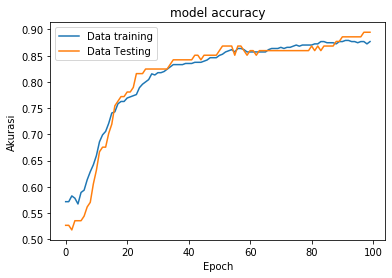

In [18]:
plt.plot(hasil_train.history['accuracy'])
plt.plot(hasil_train.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('Akurasi')
plt.xlabel('Epoch')
plt.legend(['Data training', 'Data Testing'], loc='upper left')
plt.savefig('model akurasi1.png')
plt.show()

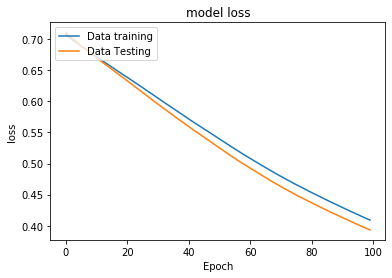

In [19]:
plt.plot(hasil_train.history['loss'])
plt.plot(hasil_train.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Data training', 'Data Testing'], loc='upper left')
plt.savefig('model loss1.png')
plt.show()

# Evaluasi Model

## Conflusion Matrix

Confusion matrix merupakan salah satu metode yang dapat digunakan untuk mengukur kinerja suatu metode klasifikasi. Pada dasarnya confusion matrix mengandung informasi yang membandingkan hasil klasifikasi yang dilakukan oleh sistem dengan hasil klasifikasi yang seharusnya 

Menghitung **Confusion Matrix** dapat memberi ide yang lebih baik tentang apakah model klasifikasinya benar dan jenis kesalahan apa yang dibuatnya.

- True Positive (TP), yaitu jumlah dari kelas 1 yang benar dan diklasifikasikan sebagai kelas 1.
- True Negative (TN), yaitu jumlah dari kelas 0 yang benar diklasifikasikan sebagai kelas 0.
- False Positive (FP), yaitu jumlah dari kelas 0 yang salah diklasifikasikan sebagai kelas 1.
- False Negative (FN), yaitu jumlah dari kelas 1 yang salah diklasifikasikan sebagai kelas 0.

In [20]:
# INport Confusion Matrix
from sklearn.metrics import confusion_matrix,classification_report
prediction = model.predict_classes(x_test)

In [21]:
import numpy as np
prediction

y_test_number = np.argmax(prediction,axis=1) #ubah one hot encoding ke data asli

In [22]:
y_test_number = prediction.reshape(114,)

In [23]:
y_test = y_test.values

In [24]:
test_cm = confusion_matrix(y_test,y_test_number)

In [25]:
test_cm

array([[60,  9],
       [ 3, 42]], dtype=int64)

In [26]:
print(classification_report(y_test,y_test_number))

              precision    recall  f1-score   support

           0       0.95      0.87      0.91        69
           1       0.82      0.93      0.87        45

    accuracy                           0.89       114
   macro avg       0.89      0.90      0.89       114
weighted avg       0.90      0.89      0.90       114



#### Dalam Conflusion Matrix,kita dapat mencari akurasi,spesifikasi,sensitivitas,presisi dengan memakai rumus manual dibawah ini

In [27]:
tp = test_cm[0][0]
fn = test_cm[0][1]
fp = test_cm[1][0]
tn = test_cm[1][1]

accuracy = (tp+tn)/(tp+tn+fp+fn)
specificity = tn/(tn+fp)
sensitivity = tp/(tp+fn)
precision = tp/(tp+fp)
f1_score = (2*sensitivity*precision)/(sensitivity+precision)

print("Accuracy test {0}".format(accuracy))
print("Specificity test {0}".format(specificity))
print("Sensitivity test {0}".format(sensitivity))
print("Precision test {0}".format(precision))
print("F1 Score test {0}".format(f1_score))

Accuracy test 0.8947368421052632
Specificity test 0.9333333333333333
Sensitivity test 0.8695652173913043
Precision test 0.9523809523809523
F1 Score test 0.909090909090909
